In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

2025-12-01 14:30:47.152016: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-01 14:30:47.188410: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-12-01 14:30:47.188420: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Generate synthetic data

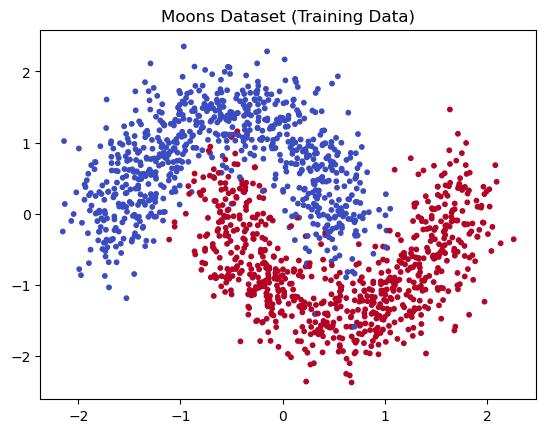

In [ ]:
# generate dataset
X, y = make_moons(n_samples=2000, noise=0.20, random_state=42)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# visualize
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.coolwarm, s=10)
plt.title("Moons Dataset (Training Data)")
plt.show()

### Build a simple NN model

In [3]:
model = models.Sequential([
layers.Dense(16, activation='relu', input_shape=(2,)),
layers.Dense(16, activation='relu'),
layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


2025-12-01 14:30:48.763633: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-01 14:30:48.763758: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-12-01 14:30:48.763784: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2025-12-01 14:30:48.763806: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2025-12-01 14:30:48.763826: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

### Train the model

In [4]:
history = model.fit(X_train, y_train,
epochs=40,
batch_size=32,
validation_data=(X_test, y_test))

Epoch 1/40
47/47 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.7107 - val_loss: 0.5188 - val_accuracy: 0.8020
Epoch 2/40
47/47 [==============================] - 0s 941us/step - loss: 0.4618 - accuracy: 0.8147 - val_loss: 0.4056 - val_accuracy: 0.8500
Epoch 3/40
47/47 [==============================] - 0s 916us/step - loss: 0.3709 - accuracy: 0.8487 - val_loss: 0.3310 - val_accuracy: 0.8700
Epoch 4/40
47/47 [==============================] - 0s 836us/step - loss: 0.3180 - accuracy: 0.8640 - val_loss: 0.2892 - val_accuracy: 0.8820
Epoch 5/40
47/47 [==============================] - 0s 832us/step - loss: 0.2878 - accuracy: 0.8747 - val_loss: 0.2658 - val_accuracy: 0.8920
Epoch 6/40
47/47 [==============================] - 0s 990us/step - loss: 0.2694 - accuracy: 0.8780 - val_loss: 0.2505 - val_accuracy: 0.8960
Epoch 7/40
47/47 [==============================] - 0s 874us/step - loss: 0.2546 - accuracy: 0.8880 - val_loss: 0.2366 - val_accuracy: 0.9020
Epoch 8/

### Visualize decision boundary

2150/2150 [==============================] - 1s 411us/step


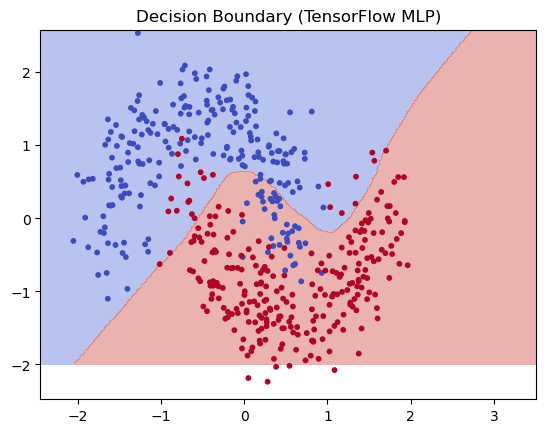

In [7]:
# create mesh grid
h = 0.02
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict
grid = np.c_[xx.ravel(), yy.ravel()]
grid = scaler.transform(grid)
Z = model.predict(grid)
Z = (Z > 0.5).astype(int).reshape(xx.shape)

# plot boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.coolwarm, s=10)
plt.title("Decision Boundary (TensorFlow MLP)")
plt.show()

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.3f}")

Test Accuracy: 0.970
